# Analyzing Popularity of Hacker News Posts

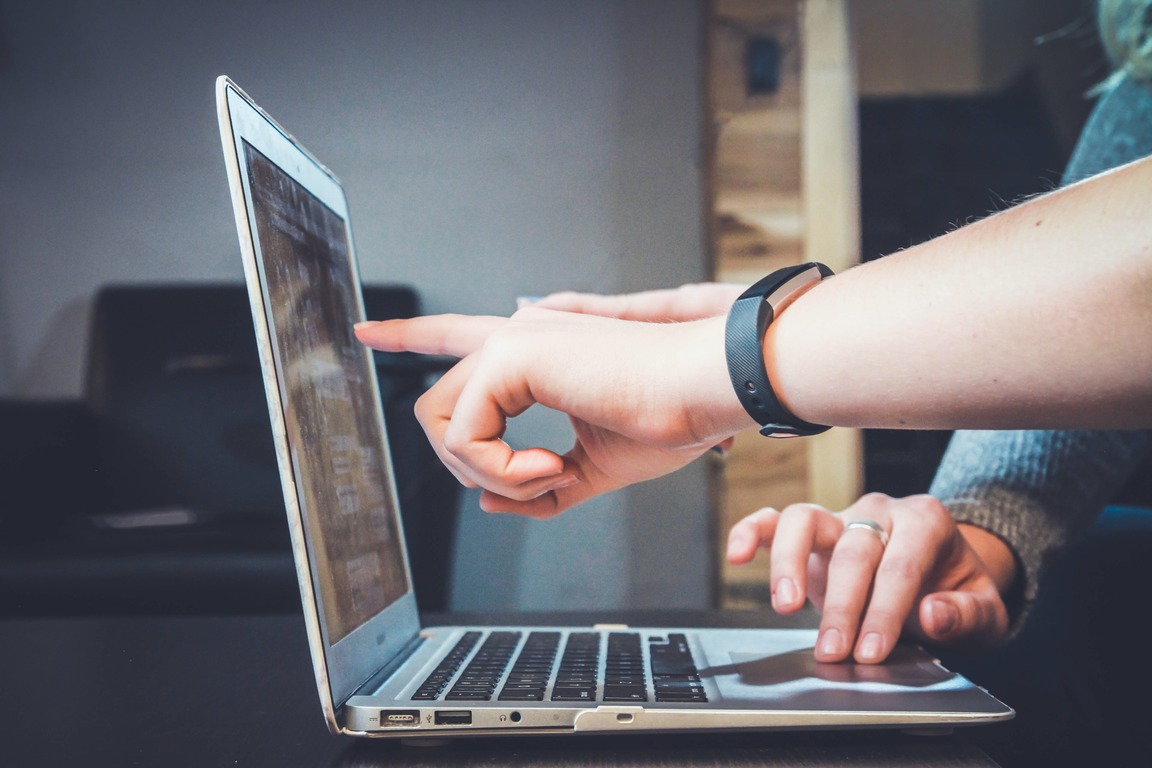

## Introduction
The aim of this project is to identify what kind of user-submitted posts on a popular technology site Hacker News receive more comments/points. In particular, we're interested in posts whose titles begin with either *Ask HN* (submitted to ask the Hacker News community a specific question) or *Show HN* (submitted to show a project, product, or just generally something interesting). We'll compare these two types of posts to determine the following:

- Do *Ask HN* or *Show HN* receive more comments/points on average?
- Do posts created at a certain time receive more comments/points on average?

The [original dataset](https://www.kaggle.com/hacker-news/hacker-news-posts) for our analysis was reduced from almost 300,000 rows to approximately 20,000 rows by removing all submissions that did not receive any comments, and then randomly sampling from the remaining submissions. For descriptions of the columns please consult the [dataset documentation](https://www.kaggle.com/hacker-news/hacker-news-posts).

*This project was completed by means of pure Python, without using any additional libraries (except for ***csv*** and ***datetime***).*
### Summary of Results
We found out  that ask posts stimulate more discussions and receive on average more comments than show posts, while show posts receive on average more points. To have a higher chance to receive comments on an ask post, we should submit it between midnight and 1.00 (Europe/Rome time zone). For a show post to receive more points, the best time to submit it is from 6.00 till 7.00 or from 19.00 till 20.00 (Europe/Rome time zone).
## Data Downloading

In [1]:
import csv
import datetime as dt

opened_file = open('hacker_news.csv')
read_file = csv.reader(opened_file)
hn = list(read_file)
print(hn[:3])

[['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at'], ['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52'], ['10975351', 'How to Use Open Source and Shut the Fuck Up at the Same Time', 'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/', '39', '10', 'josep2', '1/26/2016 19:30']]


In order to analyze this data, we need to first remove the row containing the column headers:

In [2]:
headers = hn[0]
hn = hn[1:]
print(headers)

['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']


## Extracting Ask HN Posts and Show HN Posts
Since we're only concerned with post titles beginning with *Ask HN* or *Show HN*, we'll create new lists of lists containing just the data for those categories.

In [3]:
ask_posts = []
show_posts = []
for row in hn:
    title = row[1]
    if title.lower().startswith('ask hn'):
        ask_posts.append(row)
    elif title.lower().startswith('show hn'):
        show_posts.append(row)

print(f'The number of ask posts: {len(ask_posts)}\n'
      f'The number of show posts: {len(show_posts)}\n\n'
      f'Examples of ask posts: {ask_posts[:3]}\n\n'
      f'Examples of show posts: {show_posts[:3]}\n')

The number of ask posts: 1744
The number of show posts: 1162

Examples of ask posts: [['12296411', 'Ask HN: How to improve my personal website?', '', '2', '6', 'ahmedbaracat', '8/16/2016 9:55'], ['10610020', 'Ask HN: Am I the only one outraged by Twitter shutting down share counts?', '', '28', '29', 'tkfx', '11/22/2015 13:43'], ['11610310', 'Ask HN: Aby recent changes to CSS that broke mobile?', '', '1', '1', 'polskibus', '5/2/2016 10:14']]

Examples of show posts: [['10627194', 'Show HN: Wio Link  ESP8266 Based Web of Things Hardware Development Platform', 'https://iot.seeed.cc', '26', '22', 'kfihihc', '11/25/2015 14:03'], ['10646440', 'Show HN: Something pointless I made', 'http://dn.ht/picklecat/', '747', '102', 'dhotson', '11/29/2015 22:46'], ['11590768', 'Show HN: Shanhu.io, a programming playground powered by e8vm', 'https://shanhu.io', '1', '1', 'h8liu', '4/28/2016 18:05']]



## Analyzing Comments for Ask HN and Show HN Posts
Let's determine if ask posts or show posts received more comments on average:

In [4]:
def find_average(dataset, column_num):
    total = 0
    for post in dataset:
        value = int(post[column_num])
        total += value
    avg = round(total/len(dataset))
    return avg

avg_ask_comments = find_average(ask_posts, 4)
avg_show_comments = find_average(show_posts, 4)
print(f'The average number of comments on ask posts: {avg_ask_comments}\n'
      f'The average number of comments on show posts: {avg_show_comments}')

The average number of comments on ask posts: 14
The average number of comments on show posts: 10


We see that ask posts received on average about 1.4 times more comments than show posts. One possible explanation here could be that people who use this site to find answers to their questions, apart from submitting their own posts, most probably also look through other submissions with similar topics, especially those that have already received some comments. So, they can participate in the available discussions, sharing their own experience and issues encountered. 

Since ask posts are more likely to receive comments, we'll focus our further analysis just on these posts.

Let's determine if ask posts created at a certain time are more likely to attract comments. For this purpose, we'll do the following:
- calculate the number of ask posts created in each hour of the day, along with the number of comments received,
- calculate the average number of comments ask posts received by hour.

In [5]:
# Isolating the date and the number of comments for each ask post
result_list_ask = []
for post in ask_posts:
    created_at = post[6]
    num_comments = int(post[4])
    result_list_ask.append([created_at, num_comments])
    
# Finding the number of ask posts and comments per hour
ask_posts_by_hour = {}
ask_comments_by_hour = {}
for row in result_list_ask:
    date = row[0]
    comment = row[1]
    date_datetime = dt.datetime.strptime(date, '%m/%d/%Y %H:%M').strftime('%H')
    ask_posts_by_hour[date_datetime] = ask_posts_by_hour.get(date_datetime, 0) + 1
    ask_comments_by_hour[date_datetime] = ask_comments_by_hour.get(date_datetime, 0) + comment
    
ask_posts_by_hour

{'09': 45,
 '13': 85,
 '10': 59,
 '14': 107,
 '16': 108,
 '23': 68,
 '12': 73,
 '17': 100,
 '15': 116,
 '21': 109,
 '20': 80,
 '02': 58,
 '18': 109,
 '03': 54,
 '05': 46,
 '19': 110,
 '01': 60,
 '22': 71,
 '08': 48,
 '04': 47,
 '00': 55,
 '06': 44,
 '07': 34,
 '11': 58}

In [6]:
ask_comments_by_hour

{'09': 251,
 '13': 1253,
 '10': 793,
 '14': 1416,
 '16': 1814,
 '23': 543,
 '12': 687,
 '17': 1146,
 '15': 4477,
 '21': 1745,
 '20': 1722,
 '02': 1381,
 '18': 1439,
 '03': 421,
 '05': 464,
 '19': 1188,
 '01': 683,
 '22': 479,
 '08': 492,
 '04': 337,
 '00': 447,
 '06': 397,
 '07': 267,
 '11': 641}

Now, we'll calculate the average number of comments for ask posts created during each hour of the day:

In [7]:
ask_avg_num_comments_hourly = []
for hour in ask_comments_by_hour:
    ask_avg_num_comments_hourly.append([hour, round(ask_comments_by_hour[hour]/ask_posts_by_hour[hour],1)])
    
ask_avg_num_comments_hourly

[['09', 5.6],
 ['13', 14.7],
 ['10', 13.4],
 ['14', 13.2],
 ['16', 16.8],
 ['23', 8.0],
 ['12', 9.4],
 ['17', 11.5],
 ['15', 38.6],
 ['21', 16.0],
 ['20', 21.5],
 ['02', 23.8],
 ['18', 13.2],
 ['03', 7.8],
 ['05', 10.1],
 ['19', 10.8],
 ['01', 11.4],
 ['22', 6.7],
 ['08', 10.2],
 ['04', 7.2],
 ['00', 8.1],
 ['06', 9.0],
 ['07', 7.9],
 ['11', 11.1]]

This format makes it hard to identify the hours with the highest average numbers of comments. Let's sort the list of lists and print the 5 highest values in an easier-to-read format:

In [8]:
# Swapping the list
swap_ask_avg_num_comments_hourly = []
for row in ask_avg_num_comments_hourly:
    swap_ask_avg_num_comments_hourly.append([row[1], row[0]])

# Sorting the list
sorted_swap = sorted(swap_ask_avg_num_comments_hourly, reverse=True)
sorted_swap

[[38.6, '15'],
 [23.8, '02'],
 [21.5, '20'],
 [16.8, '16'],
 [16.0, '21'],
 [14.7, '13'],
 [13.4, '10'],
 [13.2, '18'],
 [13.2, '14'],
 [11.5, '17'],
 [11.4, '01'],
 [11.1, '11'],
 [10.8, '19'],
 [10.2, '08'],
 [10.1, '05'],
 [9.4, '12'],
 [9.0, '06'],
 [8.1, '00'],
 [8.0, '23'],
 [7.9, '07'],
 [7.8, '03'],
 [7.2, '04'],
 [6.7, '22'],
 [5.6, '09']]

In [9]:
# Finding the 5 highest values
print('TOP5 Hours for Ask HN Comments')
for row[0], row[1] in sorted_swap[:5]:
    hour = dt.datetime.strptime(row[1], '%H').strftime('%H:%M')
    average = row[0]
    print(f'{hour}: {average} average comments per post')

TOP5 Hours for Ask HN Comments
15:00: 38.6 average comments per post
02:00: 23.8 average comments per post
20:00: 21.5 average comments per post
16:00: 16.8 average comments per post
21:00: 16.0 average comments per post


Thus, from all ask posts that received comments the most commented ones are those created in the following time ranges: 15.00-17.00, 2.00-3.00, 20.00-22.00, with the most favorable time range (with a big gap from its runner-up) being from 15.00 till 16.00. According to the [dataset documentation](https://www.kaggle.com/hacker-news/hacker-news-posts), the time is  related to the time zone Eastern Time in the US. Hence, taking into account our time zone (Europe/Rome), to have a higher chance of receiving comments on an ask post, we should create it between midnight and 1.00.

## Analyzing Points for Ask HN and Show HN Posts
Next, we'll conduct a similar analysis for the number of points received by ask posts and show posts to see if we can find some other insights. We're going to use the same code as above, with the corresponding modifications.

Again, let's start with determining which of these 2 groups received more points on average:

In [10]:
avg_ask_points = find_average(ask_posts, 3)
avg_show_points = find_average(show_posts, 3)
print(f'The average number of points on ask posts: {avg_ask_points}\n'
      f'The average number of points on show posts: {avg_show_points}')

The average number of points on ask posts: 15
The average number of points on show posts: 28


For points, we observe just the opposite picture than with comments: show posts received on average about 1.8 times more points than ask posts. It can be explained by 2 things:

- Show posts tend to represent some kind of new findings, projects, or at least something less common and less discussed. They attract the attention of those people who right now are not searching for an answer to their question but just want to reinforce their technical skills and learn something new. So they probably don't have much to comment but can express their opinion by making points to the interesting posts.
- The number of points the post acquired is calculated as the total number of upvotes minus the total number of downvotes. Even though downvotes can be a frustrating experience for the author of a post, they still can take place, and most probably they are more common in ask posts, which are prone to debates, agreements, and disagreements. This leads to ask posts having more comments but at the same time fewer points.

Since show posts are more likely to receive points, we're going to analyze only this group:

In [11]:
# Isolating the date and the number of points for each show post
result_list_show = []
for post in show_posts:
    created_at = post[6]
    num_points = int(post[3])
    result_list_show.append([created_at, num_points])
    
# Finding the amount of show posts and points per hour
show_posts_by_hour = {}
show_points_by_hour = {}
for row in result_list_show:
    date = row[0]
    point = row[1]
    date_datetime = dt.datetime.strptime(date, '%m/%d/%Y %H:%M').strftime('%H')
    show_posts_by_hour[date_datetime] = show_posts_by_hour.get(date_datetime, 0) + 1
    show_points_by_hour[date_datetime] = show_points_by_hour.get(date_datetime, 0) + point
    
# Calculating the average number of points for show posts per hour
show_avg_num_points_hourly = []
for hour in show_points_by_hour:
    show_avg_num_points_hourly.append([hour, round(show_points_by_hour[hour]/show_posts_by_hour[hour],1)])

# Swapping the list
swap_show_avg_num_points_hourly = []
for row in show_avg_num_points_hourly:
    swap_show_avg_num_points_hourly.append([row[1], row[0]])
    
# Sorting the list
sorted_swap = sorted(swap_show_avg_num_points_hourly, reverse=True)

# Finding the 5 highest values
print('TOP5 Hours for Show HN Points')
for row[0], row[1] in sorted_swap[:5]:
    hour = dt.datetime.strptime(row[1], '%H').strftime('%H:%M')
    average = row[0]
    print(f'{hour}: {average} average points per post')

TOP5 Hours for Show HN Points
23:00: 42.4 average points per post
12:00: 41.7 average points per post
22:00: 40.3 average points per post
00:00: 37.8 average points per post
18:00: 36.3 average points per post


We see that from all show posts that received comments, the biggest number of points got those created in the following time ranges (Eastern Time): 22.00-1.00, 12.00-13.00, 18.00-19.00. The most favorable time range is from 23.00 till midnight, which for our time zone (Europe/Rome) is 6.00-7.00. However, since for many people, an early morning doesn't seem to be a convenient time to write posts, and since the difference between the first and the second highest values is not significant, the second popular time range (19.00-20.00 for our time zone) is also perfect for having a higher chance of receiving points on a show post.
## Conclusion
In this project, we analyzed ask and show posts out of 20,000 Hacker News posts. Below are our main insights: 
- Ask posts stimulate more discussions and receive on average more comments than show posts, while show posts, being somehow innovative, receive on average more points. 
- To have a higher chance to receive comments on an ask post, we should submit it between midnight and 1.00 (Europe/Rome time zone). 
- For a show post to receive more points, the best time to submit it is from 6.00 till 7.00 or from 19.00 till 20.00 (Europe/Rome time zone).